In [880]:
import pandas as pd
import numpy as np
from random import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline 
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
df2 = pd.read_csv("https://raw.githubusercontent.com/brusso115/NCAA-March-Madness-Model/master/Data-Cleaning/data_cleaned.csv")
try:
    df2 = df2.drop(["Unnamed: 0"],axis=1)
except:
    next
try:
    df2 = df2.drop(["Unnamed: 0.1"],axis=1)
except:
    next

## Data Cleaning

In [ ]:
###########################################################
###### Don't need to run any cells in Data Cleaning #######
###########################################################

In [813]:
df = pd.read_csv("projectdata\Stage2DataFiles\RegularSeasonDetailedResults.csv")

In [816]:
df2 = pd.read_csv("NCAATourneyResults_Averages_conf_seeds.csv")

In [10]:
results = pd.read_csv("2018RegularSeasonDetailedStats_Cleaned.csv")

In [810]:
chosen_idx = np.random.choice(87504, replace = False, size = int(87504/2))
chosen_idx
not_in_indices = [x for x in range(87504) if x not in chosen_idx]

In [814]:
## set up matchup dataframe
df["TeamID"] = 0
df["OppID"] = 0
df["W"] = 0
df["TScore"] = 0
df["OScore"] = 0
df["TFGM"] = 0
df["TFGA"] = 0
df["TFGM3"] = 0
df["TFGA3"] = 0
df["TFTM"] = 0
df["TFTA"] = 0
df["TOR"] = 0
df["TDR"] = 0
df["TAst"] = 0
df["TTO"] = 0
df["TStl"] = 0
df["TBlk"] = 0
df["TPF"] = 0
df["OFGM"] = 0
df["OFGA"] = 0
df["OFGM3"] = 0
df["OFGA3"] = 0
df["OFTM"] = 0
df["OFTA"] = 0
df["OOR"] = 0
df["ODR"] = 0
df["OAst"] = 0
df["OTO"] = 0
df["OStl"] = 0
df["OBlk"] = 0
df["OPF"] = 0

df["TeamID"].iloc[chosen_idx] = df.WTeamID
df["OppID"].iloc[chosen_idx] = df.LTeamID
df["TeamID"].iloc[not_in_indices] = df.LTeamID
df["OppID"].iloc[not_in_indices] = df.WTeamID
df["W"].iloc[chosen_idx] = 1
df["W"].iloc[not_in_indices] = 0

df["TScore"].iloc[chosen_idx] = df.WScore
df["OScore"].iloc[chosen_idx] = df.LScore
df["TFGM"].iloc[chosen_idx] = df.WFGM
df["TFGA"].iloc[chosen_idx] = df.WFGA
df["TFGM3"].iloc[chosen_idx] = df.WFGM3
df["TFGA3"].iloc[chosen_idx] = df.WFGA3
df["TFTM"].iloc[chosen_idx] = df.WFTM
df["TFTA"].iloc[chosen_idx] = df.WFTA
df["TOR"].iloc[chosen_idx] = df.WOR
df["TDR"].iloc[chosen_idx] = df.WDR
df["TAst"].iloc[chosen_idx] = df.WAst
df["TTO"].iloc[chosen_idx] = df.WTO
df["TStl"].iloc[chosen_idx] = df.WStl
df["TBlk"].iloc[chosen_idx] = df.WBlk
df["TPF"].iloc[chosen_idx] = df.WPF
df["OFGM"].iloc[chosen_idx] = df.LFGM
df["OFGA"].iloc[chosen_idx] = df.LFGA
df["OFGM3"].iloc[chosen_idx] = df.LFGM3
df["OFGA3"].iloc[chosen_idx] = df.LFGA3
df["OFTM"].iloc[chosen_idx] = df.LFTM
df["OFTA"].iloc[chosen_idx] = df.LFTA
df["OOR"].iloc[chosen_idx] = df.LOR
df["ODR"].iloc[chosen_idx] = df.LDR
df["OAst"].iloc[chosen_idx] = df.LAst
df["OTO"].iloc[chosen_idx] = df.LTO
df["OStl"].iloc[chosen_idx] = df.LStl
df["OBlk"].iloc[chosen_idx] = df.LBlk
df["OPF"].iloc[chosen_idx] = df.LPF
df["TScore"].iloc[not_in_indices] = df.LScore
df["OScore"].iloc[not_in_indices] = df.WScore
df["TFGM"].iloc[not_in_indices] = df.LFGM
df["TFGA"].iloc[not_in_indices] = df.LFGA
df["TFGM3"].iloc[not_in_indices] = df.LFGM3
df["TFGA3"].iloc[not_in_indices] = df.LFGA3
df["TFTM"].iloc[not_in_indices] = df.LFTM
df["TFTA"].iloc[not_in_indices] = df.LFTA
df["TOR"].iloc[not_in_indices] = df.LOR
df["TDR"].iloc[not_in_indices] = df.LDR
df["TAst"].iloc[not_in_indices] = df.LAst
df["TTO"].iloc[not_in_indices] = df.LTO
df["TStl"].iloc[not_in_indices] = df.LStl
df["TBlk"].iloc[not_in_indices] = df.LBlk
df["TPF"].iloc[not_in_indices] = df.LPF
df["OFGM"].iloc[not_in_indices] = df.WFGM
df["OFGA"].iloc[not_in_indices] = df.WFGA
df["OFGM3"].iloc[not_in_indices] = df.WFGM3
df["OFGA3"].iloc[not_in_indices] = df.WFGA3
df["OFTM"].iloc[not_in_indices] = df.WFTM
df["OFTA"].iloc[not_in_indices] = df.WFTA
df["OOR"].iloc[not_in_indices] = df.WOR
df["ODR"].iloc[not_in_indices] = df.WDR
df["OAst"].iloc[not_in_indices] = df.WAst
df["OTO"].iloc[not_in_indices] = df.WTO
df["OStl"].iloc[not_in_indices] = df.WStl
df["OBlk"].iloc[not_in_indices] = df.WBlk
df["OPF"].iloc[not_in_indices] = df.WPF

In [852]:
dfresults = df[["Season","TeamID","OppID","W"]]
dfresults.head(3)

,Season,TeamID,OppID,W
0,2003,1328,1104,0
1,2003,1393,1272,0
2,2003,1266,1437,1


In [817]:
# add record against common opponents, win percentage
df2["Tcom"] = 0
df2["Ocom"] = 0
df2["TWP"] = 0
df2["OWP"] = 0
for row in range(len(df2)):
    season = df2.iloc[row].Season
    team = df2.iloc[row]["TeamID"]
    opp = df2.iloc[row]["OppID"]
    
    wins = 0
    games = 0
    wins += np.sum(dfresults[dfresults.Season==2018][dfresults.TeamID==team]["W"])
    games += len(dfresults[dfresults.Season==2018][dfresults.TeamID==team]["W"])
    wins += np.sum(1-dfresults[dfresults.Season==2018][dfresults.OppID==team]["W"])
    games += len(dfresults[dfresults.Season==2018][dfresults.OppID==team]["W"])
    wp = wins/games
    df2["TWP"].iloc[row] = wp
    
    wins = 0
    games = 0
    wins += np.sum(dfresults[dfresults.Season==2018][dfresults.TeamID==opp]["W"])
    games += len(dfresults[dfresults.Season==2018][dfresults.TeamID==opp]["W"])
    wins += np.sum(1-dfresults[dfresults.Season==2018][dfresults.OppID==opp]["W"])
    games += len(dfresults[dfresults.Season==2018][dfresults.OppID==opp]["W"])
    wp = wins/games
    df2["OWP"].iloc[row] = wp
    
    a = dfresults[dfresults.TeamID==team][dfresults.Season==season]["OppID"].values
    b = dfresults[dfresults.TeamID==opp][dfresults.Season==season]["OppID"].values
    com = np.intersect1d(a, b)
    t = 0
    o = 0
    tgames = 0
    ogames = 0
    if len(com)>0:
        
        for i in com:
            t+=np.sum(dfresults.loc[dfresults.Season==season][dfresults.TeamID==team][dfresults.OppID==i]["W"].values)
            o+=np.sum(dfresults.loc[dfresults.Season==season][dfresults.TeamID==opp][dfresults.OppID==i]["W"].values)
            tgames += len(dfresults.loc[dfresults.Season==season][dfresults.TeamID==team][dfresults.OppID==i]["W"].values)
            ogames += len(dfresults.loc[dfresults.Season==season][dfresults.TeamID==opp][dfresults.OppID==i]["W"].values)
            tncom += tgames
            oncom += ogames
    a = dfresults[dfresults.Season==season][dfresults.OppID==team]["TeamID"].values
    b = dfresults[dfresults.Season==season][dfresults.OppID==opp]["TeamID"].values
    com = np.intersect1d(a, b)
    if len(com)>0:
        ncom += len(com)
        for i in com:
            t+=np.sum(1-dfresults.loc[dfresults.Season==season][dfresults.OppID==team][dfresults.TeamID==i]["W"].values)
            o+=np.sum(1-dfresults.loc[dfresults.Season==season][dfresults.OppID==opp][dfresults.TeamID==i]["W"].values)
            tgames += len(dfresults.loc[dfresults.Season==season][dfresults.OppID==team][dfresults.TeamID==i]["W"].values)
            ogames += len(dfresults.loc[dfresults.Season==season][dfresults.OppID==opp][dfresults.TeamID==i]["W"].values)
    try:
        t = float(t / tgames)
        o = float(o / ogames)
        df2["Tcom"].iloc[row] = t
        df2["Ocom"].iloc[row] = o
    except:
        next
    print(row,end="\r")
df2[1:20]

,Unnamed: 0,Season,TeamID,OppID,W,TScore,OScore,TFGM,TFGA,TFGM3,...,OBlk,OPF,Tconf,Oconf,Tseed,Oseed,Tcom,Ocom,TWP,OWP
1,1,2003,1436,1112,0,67.793103,85.214286,24.827586,55.862069,5.275862,...,4.214286,17.750000,32,29,16,1,1.0,1.000000,0.787879,0.794118
2,2,2003,1113,1272,1,75.965517,74.517241,27.206897,56.896552,4.000000,...,5.068966,18.758621,29,13,10,7,0.0,0.000000,0.645161,0.617647
3,3,2003,1141,1166,1,79.344828,79.242424,26.620690,52.689655,6.827586,...,4.454545,17.272727,32,2,11,6,1.0,1.000000,0.533333,0.645161
4,4,2003,1143,1301,1,74.482759,72.400000,27.344828,58.724138,6.413793,...,3.066667,18.666667,32,16,8,9,0.0,0.000000,0.258065,0.656250
5,5,2003,1163,1140,1,80.033333,72.451613,29.533333,62.200000,6.066667,...,2.516129,21.419355,1,32,5,12,1.0,1.000000,0.437500,0.705882
6,6,2003,1181,1161,1,81.966667,74.000000,27.366667,60.333333,7.333333,...,4.233333,20.566667,4,1,3,14,0.0,0.000000,0.787879,0.322581
7,7,2003,1153,1211,0,67.321429,77.064516,22.892857,56.678571,6.678571,...,3.516129,18.645161,0,7,8,9,0.0,0.000000,0.882353,0.882353
8,8,2003,1443,1228,0,73.096774,75.433333,25.709677,55.903226,7.709677,...,3.100000,19.133333,0,9,13,4,0.0,0.000000,0.696970,0.419355
9,9,2003,1242,1429,1,81.333333,65.966667,30.233333,62.300000,4.800000,...,2.000000,16.100000,11,31,2,15,0.0,0.000000,0.794118,0.484848
10,10,2003,1221,1266,0,69.344828,78.392857,24.206897,52.724138,5.310345,...,3.642857,18.642857,8,12,14,3,0.0,0.000000,0.387097,0.593750


In [820]:
df2["seed_diff"] = df2.Tseed - df2.Oseed
df2["WP_diff"] = df2.TWP - df2.OWP
df2["com_diff"] = df2.Tcom - df2.Ocom
df2["score_diff"] = df2.TScore - df2.OScore

In [853]:
df2.to_csv("data_cleaned.csv")

## Preprocessing

In [881]:
X = df2.iloc[:,4:]
y = df2["W"]
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]
features_df_new.head()

,TScore,TFGM,TAst,OFGM,Tseed,Oseed,seed_diff,WP_diff,com_diff,score_diff
0,71.206897,24.379310,13.034483,24.733333,16,16,0,0.171727,0.0,-1.593103
1,67.793103,24.827586,14.206897,30.321429,16,1,15,-0.006239,0.0,-17.421182
2,75.965517,27.206897,15.551724,26.275862,10,7,3,0.027514,0.0,1.448276
3,79.344828,26.620690,15.620690,28.696970,11,6,5,-0.111828,0.0,0.102403
4,74.482759,27.344828,16.000000,24.333333,8,9,-1,-0.398185,0.0,2.082759


In [882]:
X = df2.iloc[:,4+cols]
y = df2["W"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, 
                                                    shuffle=True, stratify=y)

## KNN

In [883]:
pipe_knn = make_pipeline(StandardScaler(),
                        KNeighborsClassifier(n_neighbors=20))

kfold = StratifiedKFold(n_splits=10,
                        random_state=123).split(X_train, y_train)

scores = []
losses = []
for k, (train, test) in enumerate(kfold):
    pipe_knn.fit(X_train.iloc[train], y_train.iloc[train])
    score = pipe_knn.score(X_train.iloc[test], y_train.iloc[test])
    scores.append(score)
    y_pred = pipe_knn.predict_proba(X_train.iloc[test])
    loss = log_loss(y_train.iloc[test],y_pred)
    losses.append(loss)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f, %.3f' % (k+1,
          np.bincount(y_train.iloc[train]), score, loss))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
print('CV Log Loss: %.3f +/- %.3f' % (np.mean(losses), np.std(losses)))

Fold:  1, Class dist.: [422 378], Acc: 0.700, 0.519
Fold:  2, Class dist.: [422 379], Acc: 0.719, 0.540
Fold:  3, Class dist.: [422 379], Acc: 0.663, 0.608
Fold:  4, Class dist.: [422 379], Acc: 0.708, 0.557
Fold:  5, Class dist.: [422 379], Acc: 0.640, 0.603
Fold:  6, Class dist.: [422 379], Acc: 0.708, 0.570
Fold:  7, Class dist.: [422 379], Acc: 0.719, 0.598
Fold:  8, Class dist.: [422 379], Acc: 0.719, 0.519
Fold:  9, Class dist.: [422 379], Acc: 0.652, 0.650
Fold: 10, Class dist.: [423 379], Acc: 0.636, 1.045

CV accuracy: 0.686 +/- 0.033
CV Log Loss: 0.621 +/- 0.147


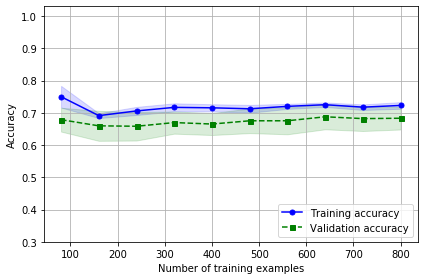

In [854]:
# number of training examples
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_knn,
                               X=X_train.values,
                               y=y_train.values,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.3, 1.03])
plt.tight_layout()
plt.savefig('06_05.png', dpi=300)
plt.show()

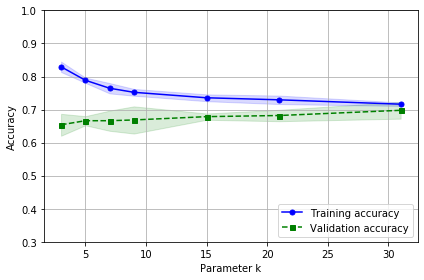

In [855]:
# n neighbors
param_range = [3, 5, 7, 9, 15, 21, 31]
train_scores, test_scores = validation_curve(
                estimator=pipe_knn, 
                X=X_train, 
                y=y_train, 
                param_name='kneighborsclassifier__n_neighbors', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter k')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

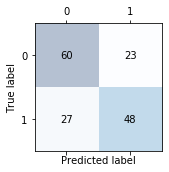

Test accuracy: 0.684
Test Log Loss: 0.553


In [856]:
# confusion matrix and test results
from sklearn.metrics import confusion_matrix

pipe_knn.fit(X_train, y_train)

y_pred = pipe_knn.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)


fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

score = pipe_knn.score(X_test, y_test)
y_probs = pipe_knn.predict_proba(X_test)[:,1]
loss = sklearn.metrics.log_loss(y_test,y_probs)
print('Test accuracy: %0.3f' % (score))
print('Test Log Loss: %0.3f' % (loss))

## Random Forest

In [857]:
kfold = StratifiedKFold(n_splits=10,
                        random_state=123).split(X_train, y_train)

pipe_lr = make_pipeline(RandomForestClassifier(n_estimators=100))

scores = []
losses = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train.iloc[train], y_train.iloc[train])
    score = pipe_lr.score(X_train.iloc[test], y_train.iloc[test])
    scores.append(score)
    y_pred = pipe_lr.predict_proba(X_train.iloc[test])
    loss = log_loss(y_train.iloc[test],y_pred)
    losses.append(loss)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f, %.3f' % (k+1,
          np.bincount(y_train.iloc[train]), score, loss))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
print('CV Log Loss: %.3f +/- %.3f' % (np.mean(losses), np.std(losses)))

Fold:  1, Class dist.: [422 378], Acc: 0.667, 0.578
Fold:  2, Class dist.: [422 379], Acc: 0.607, 0.669
Fold:  3, Class dist.: [422 379], Acc: 0.562, 0.720
Fold:  4, Class dist.: [422 379], Acc: 0.753, 0.470
Fold:  5, Class dist.: [422 379], Acc: 0.730, 0.500
Fold:  6, Class dist.: [422 379], Acc: 0.663, 0.608
Fold:  7, Class dist.: [422 379], Acc: 0.663, 0.575
Fold:  8, Class dist.: [422 379], Acc: 0.764, 0.561
Fold:  9, Class dist.: [422 379], Acc: 0.663, 0.662
Fold: 10, Class dist.: [423 379], Acc: 0.727, 0.562

CV accuracy: 0.680 +/- 0.061
nCV Log Loss: 0.590 +/- 0.073


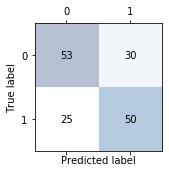

Test accuracy: 0.652
Test Log Loss: 0.581


In [858]:
#confusion matrix and test results
y_pred = pipe_lr.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()


score = pipe_lr.score(X_test, y_test)
y_probs = pipe_lr.predict_proba(X_test)[:,1]
loss = sklearn.metrics.log_loss(y_test,y_probs)
print('Test accuracy: %0.3f' % (score))
print('Test Log Loss: %0.3f' % (loss))

## Ensemble

### Bagging

In [859]:
bag = BaggingClassifier(base_estimator = pipe_knn,n_estimators=20,max_samples=.75)

kfold = StratifiedKFold(n_splits=10,
                        random_state=123).split(X_train, y_train)

scores = []
losses = []
for k, (train, test) in enumerate(kfold):
    bag.fit(X_train.iloc[train], y_train.iloc[train])
    score = bag.score(X_train.iloc[test], y_train.iloc[test])
    scores.append(score)
    y_pred = bag.predict_proba(X_train.iloc[test])
    loss = log_loss(y_train.iloc[test],y_pred)
    losses.append(loss)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f, %.3f' % (k+1,
          np.bincount(y_train.iloc[train]), score, loss))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
print('CV Log Loss: %.3f +/- %.3f' % (np.mean(losses), np.std(losses)))

Fold:  1, Class dist.: [422 378], Acc: 0.711, 0.595
Fold:  2, Class dist.: [422 379], Acc: 0.685, 0.614
Fold:  3, Class dist.: [422 379], Acc: 0.674, 0.628
Fold:  4, Class dist.: [422 379], Acc: 0.753, 0.518
Fold:  5, Class dist.: [422 379], Acc: 0.742, 0.530
Fold:  6, Class dist.: [422 379], Acc: 0.719, 0.572
Fold:  7, Class dist.: [422 379], Acc: 0.685, 0.571
Fold:  8, Class dist.: [422 379], Acc: 0.708, 0.589
Fold:  9, Class dist.: [422 379], Acc: 0.674, 0.620
Fold: 10, Class dist.: [423 379], Acc: 0.750, 0.559

CV accuracy: 0.710 +/- 0.029
CV Log Loss: 0.579 +/- 0.035


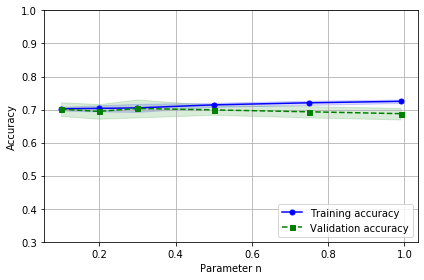

In [860]:
#bagging sample size
param_range = [.1, .2, .3, .5, .75,.99]
train_scores, test_scores = validation_curve(
                estimator=bag, 
                X=X_train, 
                y=y_train, 
                param_name='max_samples', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter n')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

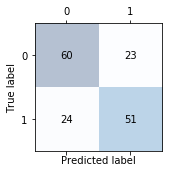

Test accuracy: 0.703
Test Log Loss: 0.546


In [861]:
#confusion matrix and test results
y_pred = bag.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)


fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

score = bag.score(X_test, y_test)
y_probs = bag.predict_proba(X_test)[:,1]
loss = sklearn.metrics.log_loss(y_test,y_probs)
print('Test accuracy: %0.3f' % (score))
print('Test Log Loss: %0.3f' % (loss))

### AdaBoost

In [862]:
boostada = AdaBoostClassifier(learning_rate=.1,n_estimators=50)

kfold = StratifiedKFold(n_splits=10,
                        random_state=123).split(X_train, y_train)

scores = []
losses = []
for k, (train, test) in enumerate(kfold):
    boostada.fit(X_train.iloc[train], y_train.iloc[train])
    score = boostada.score(X_train.iloc[test], y_train.iloc[test])
    scores.append(score)
    y_pred = boostada.predict_proba(X_train.iloc[test])
    loss = log_loss(y_train.iloc[test],y_pred)
    losses.append(loss)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f, %.3f' % (k+1,
          np.bincount(y_train.iloc[train]), score, loss))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
print('CV Log Loss: %.3f +/- %.3f' % (np.mean(losses), np.std(losses)))

Fold:  1, Class dist.: [422 378], Acc: 0.678, 0.625
Fold:  2, Class dist.: [422 379], Acc: 0.629, 0.634
Fold:  3, Class dist.: [422 379], Acc: 0.573, 0.660
Fold:  4, Class dist.: [422 379], Acc: 0.764, 0.599
Fold:  5, Class dist.: [422 379], Acc: 0.730, 0.614
Fold:  6, Class dist.: [422 379], Acc: 0.652, 0.628
Fold:  7, Class dist.: [422 379], Acc: 0.685, 0.638
Fold:  8, Class dist.: [422 379], Acc: 0.697, 0.628
Fold:  9, Class dist.: [422 379], Acc: 0.674, 0.654
Fold: 10, Class dist.: [423 379], Acc: 0.750, 0.637

CV accuracy: 0.683 +/- 0.054
CV Log Loss: 0.631 +/- 0.017


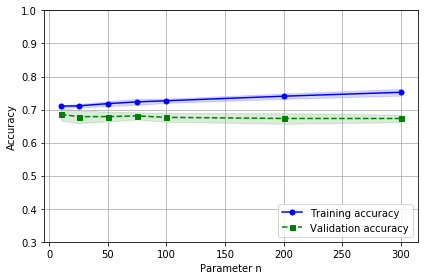

In [863]:
## n estimators
param_range = [10,25,50,75,100,200,300]
train_scores, test_scores = validation_curve(
                estimator=boostada, 
                X=X_train, 
                y=y_train, 
                param_name='n_estimators', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter n')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

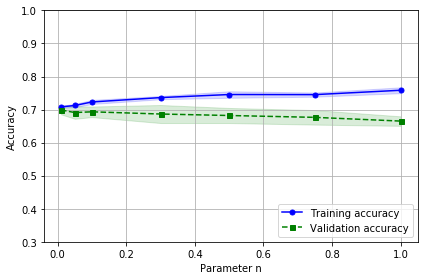

In [797]:
## learning rate
param_range = [.01,.05,.1, .3, .5,.75,1]
train_scores, test_scores = validation_curve(
                estimator=boostada, 
                X=X_train, 
                y=y_train, 
                param_name='learning_rate', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter n')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

In [839]:
#feature importances
for feat, importance in zip(X_train.columns, reversed(np.sort(boostada.feature_importances_))):
    print('feature: %s, importance: %.3f' % (feat, importance))

feature: TScore, importance: 0.400
feature: TFGM, importance: 0.140
feature: TAst, importance: 0.100
feature: OFGM, importance: 0.080
feature: Tseed, importance: 0.080
feature: Oseed, importance: 0.080
feature: seed_diff, importance: 0.060
feature: WP_diff, importance: 0.040
feature: com_diff, importance: 0.020
feature: score_diff, importance: 0.000


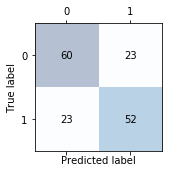

Test accuracy: 0.709
Test Log Loss: 0.623


In [864]:
#confustion matrix and test results
y_pred = boostada.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)


fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

score = boostada.score(X_test, y_test)
y_probs = boostada.predict_proba(X_test)[:,1]
loss = sklearn.metrics.log_loss(y_test,y_probs)
print('Test accuracy: %0.3f' % (score))
print('Test Log Loss: %0.3f' % (loss))

### Gradient Boost

In [865]:
boostgrad = GradientBoostingClassifier(learning_rate=.1)
kfold = StratifiedKFold(n_splits=10,
                        random_state=123).split(X_train, y_train)

scores = []
losses = []
for k, (train, test) in enumerate(kfold):
    boostgrad.fit(X_train.iloc[train], y_train.iloc[train])
    score = boostgrad.score(X_train.iloc[test], y_train.iloc[test])
    scores.append(score)
    y_pred = boostgrad.predict_proba(X_train.iloc[test])
    loss = log_loss(y_train.iloc[test],y_pred)
    losses.append(loss)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f, %.3f' % (k+1,
          np.bincount(y_train.iloc[train]), score, loss))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
print('CV Log Loss: %.3f +/- %.3f' % (np.mean(losses), np.std(losses)))

Fold:  1, Class dist.: [422 378], Acc: 0.667, 0.609
Fold:  2, Class dist.: [422 379], Acc: 0.697, 0.569
Fold:  3, Class dist.: [422 379], Acc: 0.607, 0.700
Fold:  4, Class dist.: [422 379], Acc: 0.719, 0.481
Fold:  5, Class dist.: [422 379], Acc: 0.730, 0.505
Fold:  6, Class dist.: [422 379], Acc: 0.640, 0.610
Fold:  7, Class dist.: [422 379], Acc: 0.697, 0.548
Fold:  8, Class dist.: [422 379], Acc: 0.719, 0.535
Fold:  9, Class dist.: [422 379], Acc: 0.663, 0.684
Fold: 10, Class dist.: [423 379], Acc: 0.705, 0.601

CV accuracy: 0.684 +/- 0.037
CV Log Loss: 0.584 +/- 0.068


In [715]:
#feature importances
for feat, importance in zip(X_train.columns, reversed(np.sort(boostgrad.feature_importances_))):
    print('feature: %s, importance: %.3f' % (feat, importance))

feature: TScore, importance: 0.442
feature: TFGM, importance: 0.104
feature: TAst, importance: 0.081
feature: OFGM, importance: 0.080
feature: Tseed, importance: 0.075
feature: Oseed, importance: 0.061
feature: comdiff, importance: 0.060
feature: WPdiff, importance: 0.046
feature: seeddiff, importance: 0.039
feature: scorediff, importance: 0.013


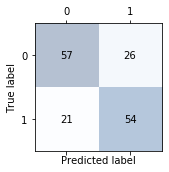

Test accuracy: 0.703
Test Log Loss: 0.586


In [866]:
#confustion matrix and test results
y_pred = boostgrad.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)


fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

score = boostgrad.score(X_test, y_test)
y_probs = boostgrad.predict_proba(X_test)[:,1]
loss = sklearn.metrics.log_loss(y_test,y_probs)
print('Test accuracy: %0.3f' % (score))
print('Test Log Loss: %0.3f' % (loss))

### Stacking

In [872]:
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
import warnings

warnings.simplefilter('ignore')

clf1 = pipe_knn
clf2 = GradientBoostingClassifier(learning_rate=.1)
clf3 = AdaBoostClassifier(learning_rate=.1)
clf4 = pipe_lr
clf5 = bag

lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf2,clf4,clf5], 
                          use_probas = True,
                          average_probas = True,
                          meta_classifier=lr)

for clf, label in zip([clf2, clf4, clf5, sclf], 
                      [
                       'Gradient Boost', 
                       
                       'Random Forest',
                       'Bagging',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=10, scoring='accuracy')
    loss = model_selection.cross_val_score(clf, X, y, 
                                              cv=10, scoring='neg_log_loss')
    print("Accuracy: %0.4f (+/- %0.2f) Log Loss: %0.4f [%s]" 
          % (scores.mean(), scores.std(), loss.mean(), label))

Accuracy: 0.6840 (+/- 0.04) Log Loss: -0.5872 [Gradient Boost]
Accuracy: 0.6917 (+/- 0.04) Log Loss: -0.6132 [Random Forest]
Accuracy: 0.6946 (+/- 0.03) Log Loss: -0.5792 [Bagging]
Accuracy: 0.6869 (+/- 0.04) Log Loss: -0.7304 [StackingClassifier]


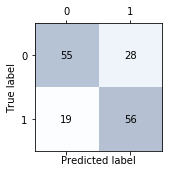

Test accuracy: 0.703
Test Log Loss: 0.551


In [873]:

sclf.fit(X_train,y_train)

y_pred = sclf.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)


fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

score = sclf.score(X_test, y_test)
y_probs = sclf.predict_meta_features(X_test)[:,1]
loss = sklearn.metrics.log_loss(y_test,y_probs)
print('Test accuracy: %0.3f' % (score))
print('Test Log Loss: %0.3f' % (loss))